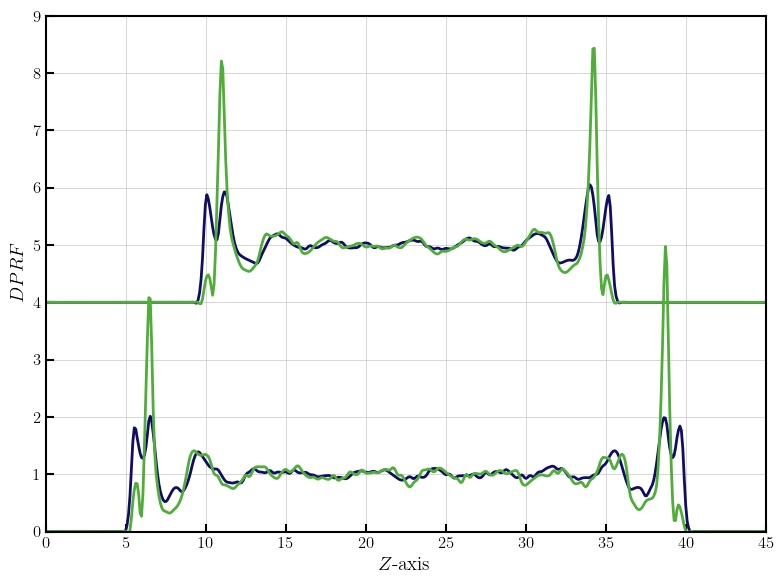

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
from matplotlib.ticker import MultipleLocator

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern"],
    "axes.labelsize": 14,
    "font.size": 12,
    "legend.fontsize": 12,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
})

# LOAD FILE GLOBAL
file_pattern = '*.dat'
filenames = sorted(glob.glob(file_pattern))

# COLORS
colors = ['#110d65', '#110d65', '#51ad39', '#51ad39' ]

shift_map = {1:4, 3:4}

fig, ax = plt.subplots(figsize=(8, 6))

for i, file in enumerate(filenames):
    data = np.loadtxt(file)
    x = data[:, 0]
    y = data[:, 1]
    y += shift_map.get(i, 0)
    label = os.path.basename(file).replace('.dat', '')
    color = colors[i % len(colors)]
    ax.plot(x, y, label=label, color=color, linewidth=2)

ax.set_xlim(0, 45)
ax.set_ylim(0, 9)

# MAJOR TICK
ax.xaxis.set_major_locator(MultipleLocator(5))  # X ticks every 
ax.yaxis.set_major_locator(MultipleLocator(1))  # Y ticks every 

for spine in ax.spines.values():
    spine.set_linewidth(1.5)

ax.tick_params(axis='both', which='major', direction='in', length=6, width=1.5, labelsize=12)
ax.tick_params(axis='both', which='minor', direction='in', length=3, width=1.0)

ax.grid(True, linewidth=0.5, alpha=0.7)

ax.set_xlabel(r'$Z$-axis', fontsize=14)
ax.set_ylabel(r'$DPRF$', fontsize=14)

# LEGEND
# ax.set_title(r'\textbf{Multi-file Plot with LaTeX Fonts}', fontsize=16)
# ax.legend()
# ax.legend(loc='upper center', fontsize=12)

# legend = ax.legend(loc='upper center', fontsize=12)
# for text in legend.get_texts():
#     text.set_rotation(45)

# SAVE PDF
# plt.tight_layout()
# plt.savefig('your_output.pdf', dpi=300)

# SAVE PNG
plt.tight_layout()
plt.savefig('DPRF.png', dpi=300)
plt.show()
